In [1]:
!pip install pycaret
!pip install kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 761.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json here

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [3]:
# Download the Wine Quality dataset from Kaggle
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

# Unzip the downloaded file
!unzip red-wine-quality-cortez-et-al-2009.zip


Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
License(s): DbCL-1.0
  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 29.8MB/s]
Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [4]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('winequality-red.csv')  # Check the file name after unzipping
data.head()  # Verify the data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
from pycaret.classification import *

# Set up the PyCaret environment
# Specify the target column (e.g., 'quality')
clf1 = setup(data=data, target='quality', session_id=42)


,Description,Value
0,Session id,42
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


In [6]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [7]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [8]:
# init setup on exp
exp.setup(data, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


In [9]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6916,0.6047,0.6916,0.6654,0.6715,0.4973,0.5027,0.2900
rf,Random Forest Classifier,0.6783,0.5899,0.6783,0.6476,0.6582,0.4768,0.4812,0.4340
lightgbm,Light Gradient Boosting Machine,0.6640,0.5841,0.6640,0.6367,0.6473,0.4580,0.4611,1.4210
xgboost,Extreme Gradient Boosting,0.6551,0.5820,0.6551,0.6317,0.6406,0.4471,0.4495,0.4900
gbc,Gradient Boosting Classifier,0.6452,0.0000,0.6452,0.6266,0.6290,0.4294,0.4332,1.8170
dt,Decision Tree Classifier,0.6086,0.5018,0.6086,0.6071,0.6058,0.3902,0.3914,0.0480
lr,Logistic Regression,0.5943,0.0000,0.5943,0.5565,0.5617,0.3244,0.3305,1.2950
lda,Linear Discriminant Analysis,0.5862,0.0000,0.5862,0.5637,0.5704,0.3334,0.3355,0.0380
ridge,Ridge Classifier,0.5782,0.0000,0.5782,0.4765,0.5216,0.2817,0.2928,0.0420
qda,Quadratic Discriminant Analysis,0.5514,0.0000,0.5514,0.5416,0.5437,0.2904,0.2921,0.0720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [10]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6702,0.5871,0.6702,0.6485,0.6494,0.4612,0.4667,0.2960
xgboost,Extreme Gradient Boosting,0.6622,0.5663,0.6622,0.6420,0.6479,0.4581,0.4607,0.5610
rf,Random Forest Classifier,0.6595,0.5761,0.6595,0.6323,0.6388,0.4444,0.4500,0.4600
lightgbm,Light Gradient Boosting Machine,0.6497,0.5725,0.6497,0.6277,0.6342,0.4365,0.4403,2.0320
gbc,Gradient Boosting Classifier,0.6345,0.0000,0.6345,0.6189,0.6231,0.4164,0.4186,1.8540
lr,Logistic Regression,0.6077,0.0000,0.6077,0.5782,0.5791,0.3493,0.3558,0.6100
lda,Linear Discriminant Analysis,0.5996,0.0000,0.5996,0.5814,0.5853,0.3572,0.3601,0.0460
ridge,Ridge Classifier,0.5880,0.0000,0.5880,0.4973,0.5318,0.2989,0.3103,0.0410
dt,Decision Tree Classifier,0.5872,0.4659,0.5872,0.5837,0.5821,0.3556,0.3572,0.0450
nb,Naive Bayes,0.5558,0.5033,0.5558,0.5628,0.5551,0.3141,0.3162,0.0440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

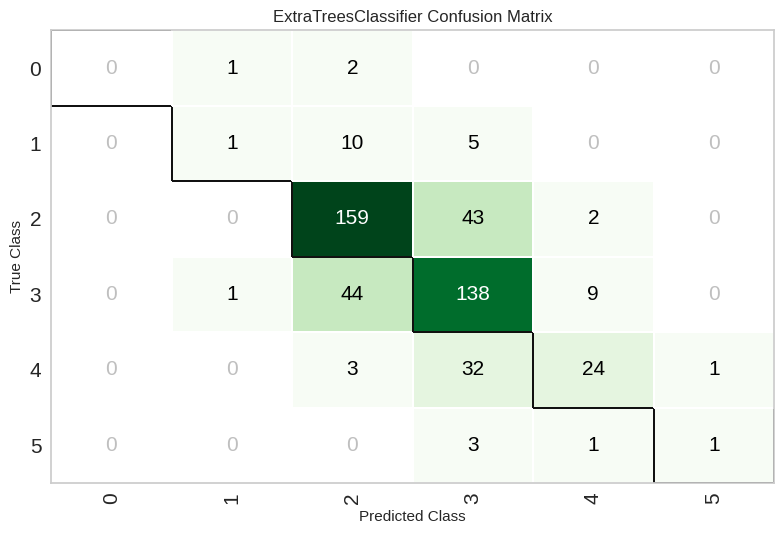

In [11]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

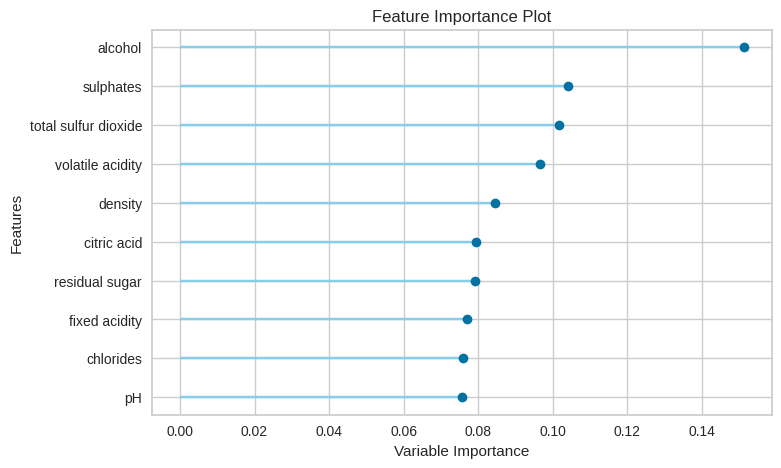

In [12]:
# plot feature importance
plot_model(best, plot = 'feature')

In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6729,0.8514,0.6729,0.6594,0.6566,0.4666,0.4703


In [15]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
416,10.6,0.48,0.64,2.2,0.111,6.0,20.0,0.99700,3.26,0.66,11.7,6,7,0.50
749,7.3,0.51,0.18,2.1,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,6,6,1.00
1321,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,6,0.36
1064,8.2,0.74,0.09,2.0,0.067,5.0,10.0,0.99418,3.28,0.57,11.8,6,6,0.45
659,7.1,0.84,0.02,4.4,0.096,5.0,13.0,0.99700,3.41,0.57,11.0,4,5,0.45


In [16]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [17]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.00
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.67
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.00
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.00
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.00


In [18]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

In [19]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=42, verbose=0,
                                      warm_start=False))],
         verbose=False)